In [53]:
import pickle,gzip,math,os,time,shutil,torch,matplotlib as mpl,numpy as np,matplotlib.pyplot as plt
import fastcore.all as fc
from collections.abc import Mapping
from pathlib import Path
from operator import attrgetter,itemgetter
from functools import partial


# !pip install matplotlib pandas
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
import seaborn as sns



ModuleNotFoundError: No module named 'torch'

Australia
New South Wales
Northern Territory
Queensland
South Australia
Tasmania
Victoria
Western Australia


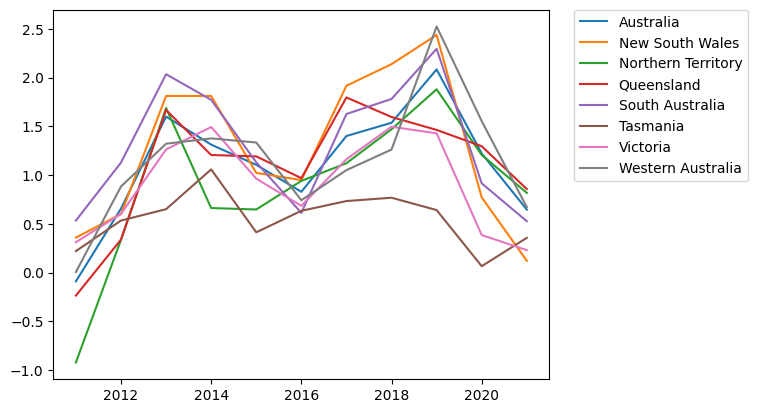

In [207]:
enviro_csv = dict( temp='Enviromental/temp_max_anomaly_c.csv', rainfall='Enviromental/total_rainfall_mm.csv', water_trades= 'Enviromental/water_trades_2011_2021.csv',water_usage= 'Enviromental/water_usage_region_year.csv')



In [ ]:

df.index.unique()# Index(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020' ,2011], dtype='object', name='Year')


Australia
New South Wales
Northern Territory
Queensland
South Australia
Tasmania
Victoria
Western Australia


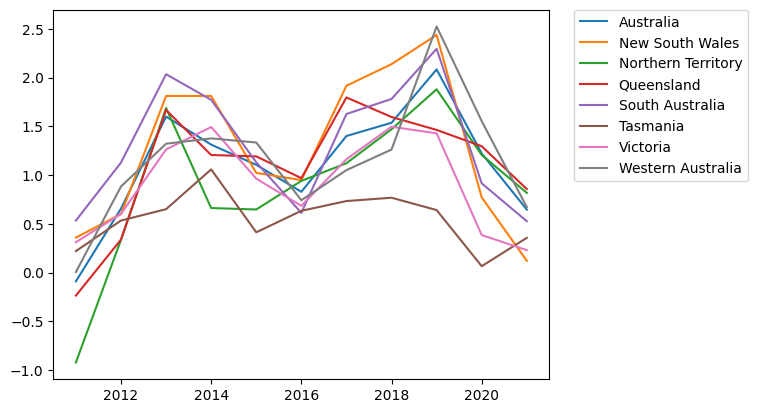

In [102]:
# https://drive.google.com/drive/folders/1Q1qfIj1odObfNIb6dPI8sTzVJ02fveno
# There are two folders with csv datasets in them (Environmental and Governance)
#
import pandas as pd
df = pd.read_csv('Enviromental/water_trades_2011_2021.csv', header = 0).dropna()

df


,resource_type,origin_state,origin_water_system,origin_trading_zone_or_WRPA,dest_state,dest_water_system,dest_trading_zone_or_WRPA,unit_of_measure,quantity_traded,net_price,price_per_ML,date_of_approval,regulated_unregulated,drainage_division,murray_darling_basin_region
1,Groundwater,New South Wales,Lachlan Alluvium (GW10),Lower Lachlan Groundwater Source,New South Wales,Lachlan Alluvium (GW10),Lower Lachlan Groundwater Source,ML,300.0,0,0.0,27-05-2019,unregulated,Murray–Darling Basin,MDB Groundwater
2,Groundwater,New South Wales,Lachlan Alluvium (GW10),Upper Lachlan Alluvial Groundwater Source / Up...,New South Wales,Lachlan Alluvium (GW10),Upper Lachlan Alluvial Groundwater Source / Up...,ML,240.0,0,0.0,27-05-2019,unregulated,Murray–Darling Basin,MDB Groundwater
3,Groundwater,New South Wales,Murray Alluvium (GW8),Lower Murray Groundwater Source,New South Wales,Murray Alluvium (GW8),Lower Murray Groundwater Source,ML,45.0,45,1.0,24-05-2019,unregulated,Murray–Darling Basin,MDB Groundwater
4,Groundwater,New South Wales,Murray Alluvium (GW8),Lower Murray Groundwater Source,New South Wales,Murray Alluvium (GW8),Lower Murray Groundwater Source,ML,7.7,0,0.0,27-05-2019,unregulated,Murray–Darling Basin,MDB Groundwater
5,Groundwater,New South Wales,Murray Alluvium (GW8),Lower Murray Groundwater Source,New South Wales,Murray Alluvium (GW8),Lower Murray Groundwater Source,ML,10.3,0,0.0,27-05-2019,unregulated,Murray–Darling Basin,MDB Groundwater
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34298,Surface water,Victoria,VIC Murray (SS2),6 VIC Murray - Dart to Barmah,Victoria,VIC Murray (SS2),7 VIC Murray - Barmah to SA,ML,2.2,0,0.0,27-10-2019,regulated,Murray–Darling Basin,Southern MDB
34299,Surface water,Victoria,VIC Murray (SS2),6 VIC Murray - Dart to Barmah,Victoria,VIC Murray (SS2),7 VIC Murray - Barmah to SA,ML,2.5,0,0.0,27-10-2019,regulated,Murray–Darling Basin,Southern MDB
34300,Surface water,Victoria,VIC Murray (SS2),6 VIC Murray - Dart to Barmah,Victoria,VIC Murray (SS2),7 VIC Murray - Barmah to SA,ML,5.0,0,0.0,27-10-2019,regulated,Murray–Darling Basin,Southern MDB
34301,Surface water,Victoria,VIC Murray (SS2),6 VIC Murray - Dart to Barmah,Victoria,VIC Murray (SS2),7 VIC Murray - Barmah to SA,ML,5.0,0,0.0,27-10-2019,regulated,Murray–Darling Basin,Southern MDB


In [101]:

df = pd.read_csv('Enviromental/water_usage_region_year.csv', header = 1).dropna()
df.iloc[1:]


,Commodity description,Unnamed: 1,Area of holding - Total area (ha) (a),"Water source - Groundwater (e.g. bores, springs, wells) - Total volume used (ML)",Water source - Total volume of water from all sources (ML) (b),Water source - Water taken from on-farm dams or tanks - Total volume used (ML),"Water source - Water taken from rivers, creeks, lakes, etc. - Total volume used (ML)",Water use - Total application rate (ML/ha),Water use - Total area watered (ha),Water use - Total volume applied (ML),Area of holding - Total area (ha) (a).1,"Water source - Groundwater (e.g. bores, springs, wells) - Total volume used (ML).1",Water source - Total volume of water from all sources (ML) (b).1,Water source - Water taken from on-farm dams or tanks - Total volume used (ML).1,"Water source - Water taken from rivers, creeks, lakes, etc. - Total volume used (ML).1",Water use - Total application rate (ML/ha).1,Water use - Total area watered (ha).1,Water use - Total volume applied (ML).1
5,Adelaide - Central and Hills,2013,55944.21,11596.94,20319.02,6748.18,1136.24,2.85,6716.88,19127.68,894.0,497.0,797.0,488.0,110.0,0.0,450.0,450.0
6,Adelaide - Central and Hills,2014,59636.80,13257.00,25435.88,8926.66,2575.09,3.44,6886.61,23690.30,784.0,557.0,767.0,448.0,116.0,0.0,478.0,478.0
7,Adelaide - Central and Hills,2015,84277.59,11653.42,16342.25,2779.75,814.13,3.23,4710.60,15202.21,415.0,281.0,401.0,203.0,61.0,0.0,260.0,260.0
8,Adelaide - Central and Hills,2016,45380.13,10159.41,14530.29,3364.41,403.28,2.59,5200.12,13482.05,434.0,298.0,408.0,237.0,25.0,0.0,279.0,279.0
9,Adelaide - Central and Hills,2017,45611.51,8147.99,13020.27,2937.24,898.57,3.43,3490.89,11980.27,365.0,231.0,339.0,183.0,19.0,0.0,229.0,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,Yarramundi - Londonderry,2020,1734.53,1.40,929.90,21.46,896.07,7.81,119.01,929.90,30.0,1.0,13.0,7.0,5.0,0.0,13.0,13.0
2002,Yass Surrounds,2020,353092.49,257.36,1429.32,266.97,904.99,2.56,564.69,1446.26,483.0,23.0,35.0,16.0,5.0,0.0,35.0,35.0
2003,Yea,2020,91341.80,318.11,2905.90,550.93,732.95,1.71,1698.11,2903.55,145.0,4.0,21.0,12.0,7.0,0.0,21.0,21.0
2009,Young,2020,49142.32,497.10,707.18,186.12,23.23,0.76,964.86,737.25,101.0,19.0,21.0,5.0,1.0,0.0,21.0,21.0


In [2]:
#Governance/agriculture_australian_economy.csv
# !cd Governance && ls

# agriculture_australian_economy.csv  cpi_consumer_price_index.csv
# commodity_production_value.csv	    employment.csv
gov = dict(economy="Governance/agriculture_australian_economy.csv", cpi="Governance/cpi_consumer_price_index.csv", commodity ="Governance/commodity_production_value.csv",employment= "Governance/employment.csv")


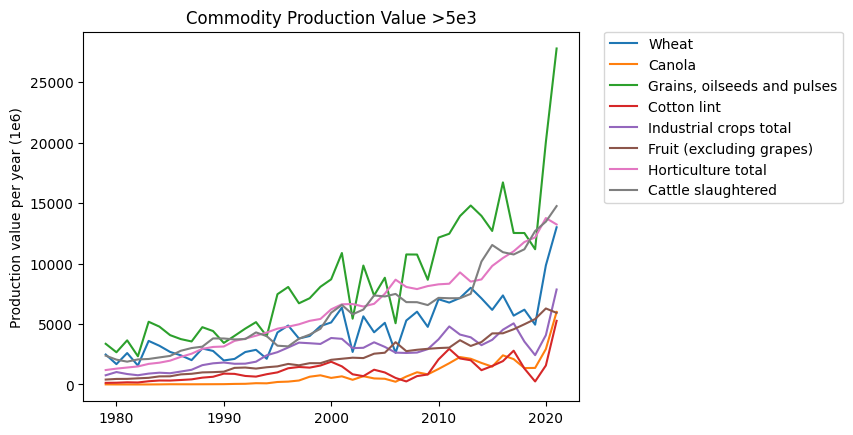

In [9]:


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(gov["commodity"], header=[0,1] ).dropna()
for commodity in df.columns:

    if 'Total crops' in commodity:
        continue


    if float(df[commodity].max()) > 5e3:
        sns.lineplot(x=df['Product'].values.squeeze(), y=df[commodity], label=commodity[0])

# Y label Production value (million dollars)


plt.title('Commodity Production Value >5e3')
plt.ylabel('Production value per year (1e6)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


,Unit
5,False
6,False
7,False
8,False
9,False
10,False
11,False
12,False
13,False
14,False


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv(gov["commodity"], header=[0,1] ).dropna()


In [4]:
df = pd.read_csv(gov["commodity"], header=[0,1] ).dropna()


In [6]:
i =2
# print(gov[1])
# pd.read_csv(gov[1], header =0).dropna()

print(gov[2])
df = pd.read_csv(gov[2], header =[0,1]).dropna()
# print(df.columns[:])
from matplotlib import pyplot as plt
for name in df.columns[:]:
    # set name to the column name you want to plot

    df[name].hist()


KeyError: 2

In [393]:
df


,Region,Estimate,Estimate.1,Estimate.2,Estimate.3,Estimate.4,Estimate.5,Estimate.6,Estimate.7,Number of agricultural businesses,Number of agricultural businesses.1,Number of agricultural businesses.2,Number of agricultural businesses.3,Number of agricultural businesses.4,Number of agricultural businesses.5,Number of agricultural businesses.6,Number of agricultural businesses.7
Year,,,,,,,,,,,,,,,,,
2011,Adelaide-Central and HillsAdelaide-NorthAdelai...,1.216334e+09,4763390.40,2.701245e+07,3941942.20,7214483.00,251.60,6422604.50,2.701245e+07,406529.0,140158.0,358630.0,206996.0,100370.0,0.0,104462.0,358630.0
2012,Adelaide - Central and HillsAdelaide - NorthAd...,1.189786e+09,5567493.60,3.577841e+07,5267375.80,8813877.80,282.40,7133772.20,3.577841e+07,386460.0,147490.0,352536.0,188081.0,80713.0,0.0,91810.0,352536.0
2013,Adelaide - Central and HillsAdelaide - NorthAd...,1.218601e+09,6237231.74,3.465314e+07,5570452.56,8938912.45,249.85,7079633.27,3.216597e+07,384703.0,140019.0,343158.0,190422.0,76656.0,0.0,108094.0,108094.0
2014,Adelaide - Central and HillsAdelaide - NorthAd...,1.153581e+09,6321340.44,2.933087e+07,3490340.85,6215398.23,267.88,6446339.07,2.684571e+07,368891.0,143082.0,330192.0,178050.0,82523.0,0.0,109426.0,109426.0
2015,Adelaide - Central and HillsAdelaide - NorthAd...,1.113139e+09,7067016.13,2.746272e+07,2939508.02,7234229.37,285.80,6442228.18,2.513572e+07,256881.0,99846.0,232220.0,120307.0,58280.0,0.0,67972.0,67969.0
2016,Adelaide - Central and HillsAdelaide - NorthAd...,1.181314e+09,5442827.79,2.988915e+07,3970961.69,8696503.31,243.35,6705846.26,2.723600e+07,263635.0,101593.0,239289.0,125335.0,54560.0,0.0,65976.0,65976.0
2017,Adelaide - Central and HillsAdelaide - NorthAd...,1.134198e+09,6459122.78,3.146137e+07,3495661.64,9015624.81,266.00,6893000.97,2.919160e+07,256090.0,98921.0,232272.0,114704.0,50113.0,0.0,67181.0,67181.0
2018,Adelaide - Central and HillsAdelaide - NorthAd...,1.151231e+09,6815684.79,2.386633e+07,2277086.87,6039079.37,385.42,5860165.81,2.153697e+07,267665.0,105072.0,239390.0,117268.0,48685.0,0.0,65381.0,65381.0
2019,Adelaide - Central and HillsAdelaide - SouthAu...,1.130825e+09,6278399.75,1.934394e+07,1621729.19,4218599.71,247.92,4547032.95,1.689752e+07,262219.0,61720.0,145798.0,60576.0,28120.0,0.0,61399.0,61399.0


In [19]:
jidf.isna().sum()


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [8]:
df = pd.read_csv(enviro_csv['water_usage'])
df = df.rename(columns={
    'Unnamed: 0':'Region',
    'Unnamed: 1':'Year',
})
df = df.dropna()
df.set_index(['Year'],inplace=True)
for column in df.columns:
    if column != 'Region':
        df[column] = pd.to_numeric(df[column], errors='coerce')
print(df.dtypes)

print(sum(map(lambda x:float(x),'11596.94	20319.02	6748.18	1136.24	2.85	6716.88	19127.68'.split())))
df = df.groupby('Year').sum()
for column in df.columns:
    if column not in( 'Region','Estimate'):
        print(df[column])
        plt.plot(df.index,df[column] ,label=column)
plt.show()


NameError: name 'enviro_csv' is not defined

In [29]:
df.dtypes


Unnamed: 0                             object
Unnamed: 1                             object
Estimate                               object
Estimate.1                             object
Estimate.2                             object
Estimate.3                             object
Estimate.4                             object
Estimate.5                             object
Estimate.6                             object
Estimate.7                             object
Number of agricultural businesses      object
Number of agricultural businesses.1    object
Number of agricultural businesses.2    object
Number of agricultural businesses.3    object
Number of agricultural businesses.4    object
Number of agricultural businesses.5    object
Number of agricultural businesses.6    object
Number of agricultural businesses.7    object
dtype: object

In [13]:

import pandas as pd

# first row is header
lng_df = pd.read_csv('Governance/Copy of agriculture_australian_economy.csv', header=1)
lng_df.head()


,Activity 2,Percent change from previous period,Imports,Exports,Current account balance,Net foreign debt level,Net foreign debt share of GDP,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Location,Australia,Australia,Australia,Australia,Australia,Australia,Australia,United States of America,European Union,Japan,Organisation for Economic Cooperation and Deve...,China,Republic of Korea
1,Measure,Rate,Value,Value,Value,Value,Rate,Rate,Rate,Rate,Rate,Rate,Rate,Rate
2,Unit,%,$m,$m,$m,$m,%,%,%,%,%,%,%,%
3,1974,1.30,"10,160.00","10,160.00",-959.00,NaN,NaN,1.76,-0.50,NaN,-1.20,0.49,2.30,9.40
4,1975,2.60,"11,253.00","11,253.00","-1,131.00","3,133.00",NaN,2.51,-0.20,NaN,3.10,0.18,8.70,7.30


In [52]:
import pandas as pd

pd.read_csv("Governance/agriculture_australian_economy.csv", header= [0,1,2])


FileNotFoundError: [Errno 2] No such file or directory: 'Governance/agriculture_australian_economy.csv'